# K-Means Clustering

In [18]:
import torch
import matplotlib.pyplot as plt

from sklearn import datasets
from twelve.unsupervised.kmeans import Kmeans

In [2]:
x_train, y_train = datasets.make_blobs(n_samples=100, centers=3, n_features=2)

In [3]:
def plot_blobs(data, labels=None, centroids=None):
    """2D plot of our blob data
    
    Args:
        labels: cluster assignment labels
    """
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.scatter(data[:, 0], data[:, 1], c=labels, s=100)
    
    if centroids is not None:
        ax.scatter(centroids[:, 0], centroids[:, 1], c='black', s=300, alpha=0.5);
    
    _ = ax.set_title('Blobs', fontsize=16)

### Visualize the Dataset

Using a simple 2D dataset with three centers, we should clearly be able to see the separation of the clusters.

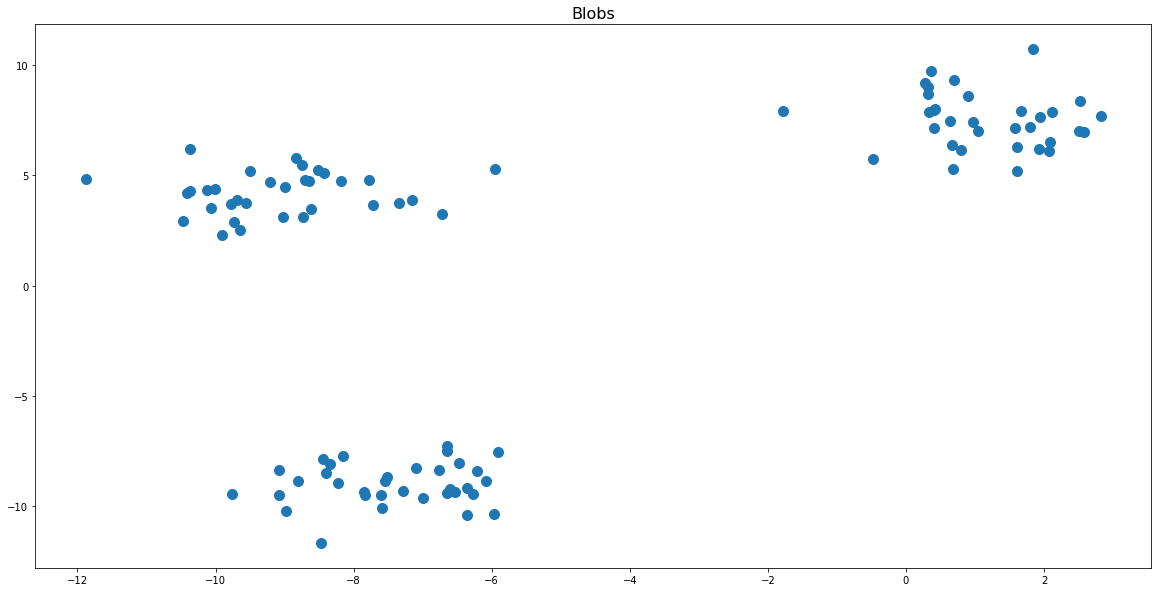

In [4]:
plot_blobs(x_train)

### K-means Model

In [12]:
model = Kmeans(k=3)

In [13]:
preds, centroids = model.predict(x_train)

### Visualize Predictions

When comparing with the true cluster labels, we see that the k-means algorithm is doing alright!

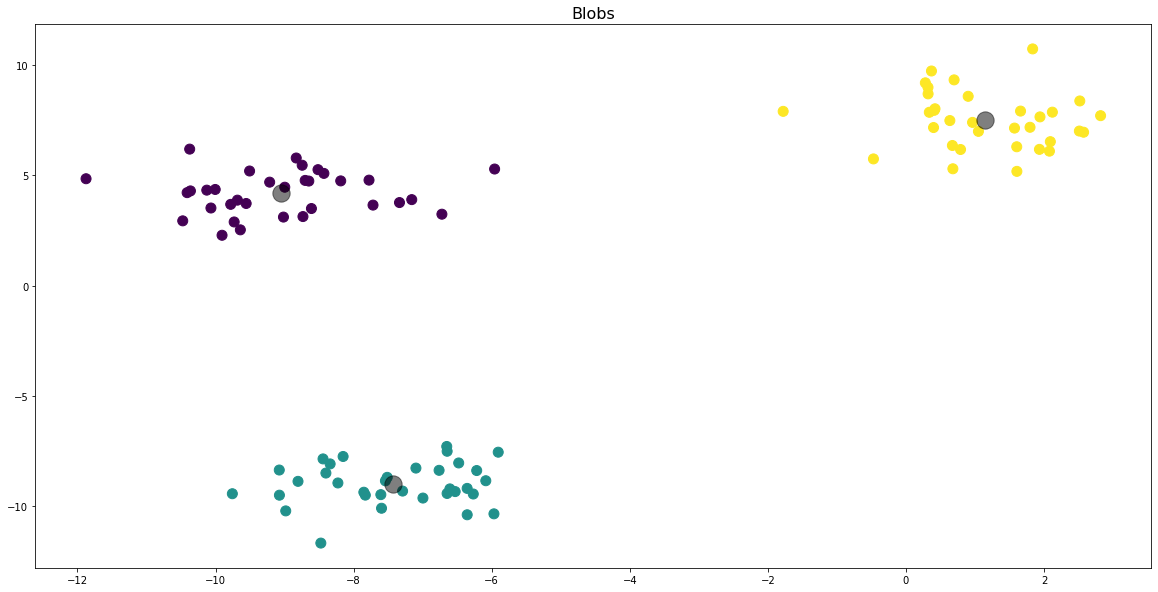

In [14]:
plot_blobs(x_train, preds, centroids)

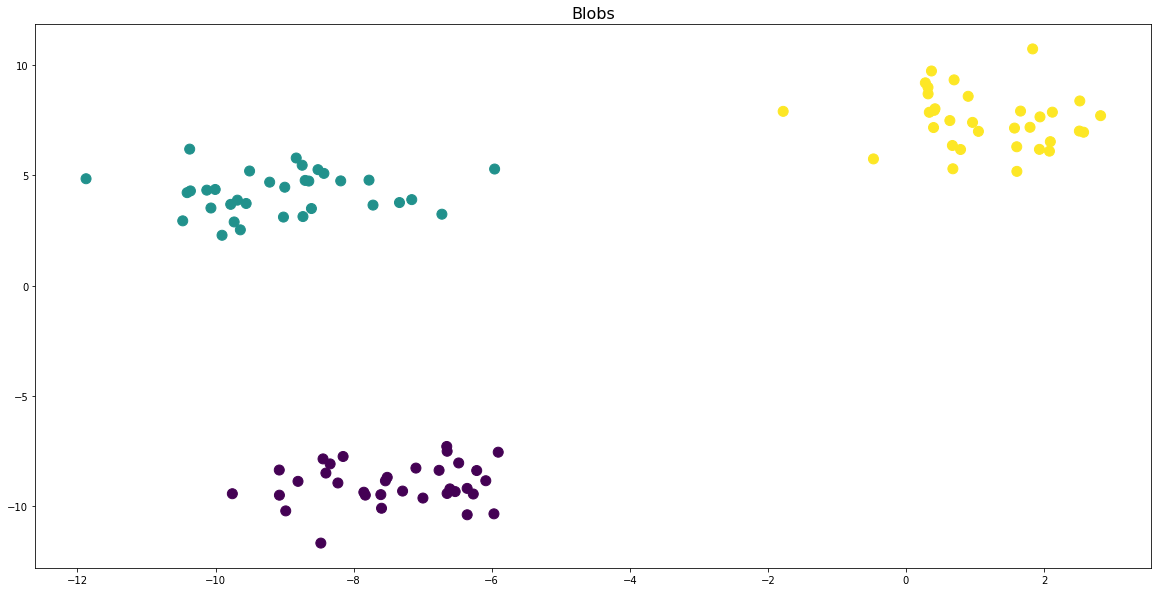

In [8]:
plot_blobs(x_train, y_train)

In [27]:
def kmeans_save(data, target, predictions, centroids, path):
    """Save both the data and our predictions"""
    torch.save({
        "data": data,
        "target": target,
        "predictions": predictions,
        "centroids": centroids
    }, path)

In [21]:
# Check if we can reload our save state
kmeans_save(x_train, y_train, preds, centroids, "save_state.pt")
saved = torch.load("save_state.pt")

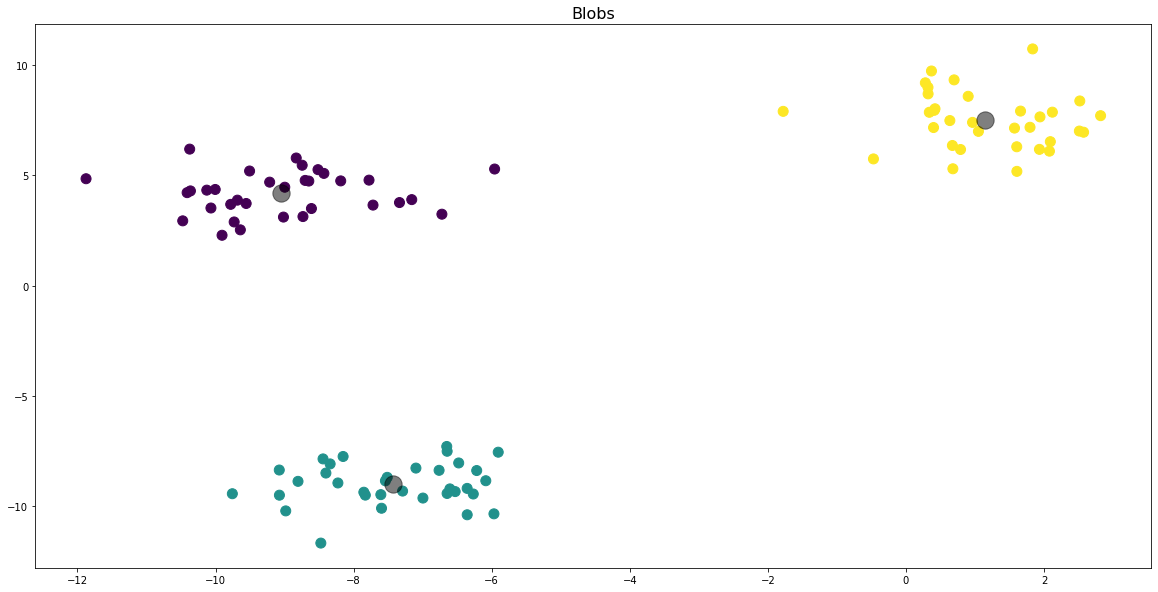

In [26]:
plot_blobs(saved["data"], saved["predictions"], saved["centroids"])